In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('smoke_detection_iot.csv')
df.head(5)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [4]:
pd.isnull(df).sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [5]:
df = df.drop(columns=['Unnamed: 0','UTC','CNT'])
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df.rename(columns = {'Temperature[C]':'Temperature', 'Humidity[%]':'Humidity','TVOC[ppb]':'TVOC', 'eCO2[ppm]':'eCO2','Pressure[hPa]':'Pressure'}, inplace = True)

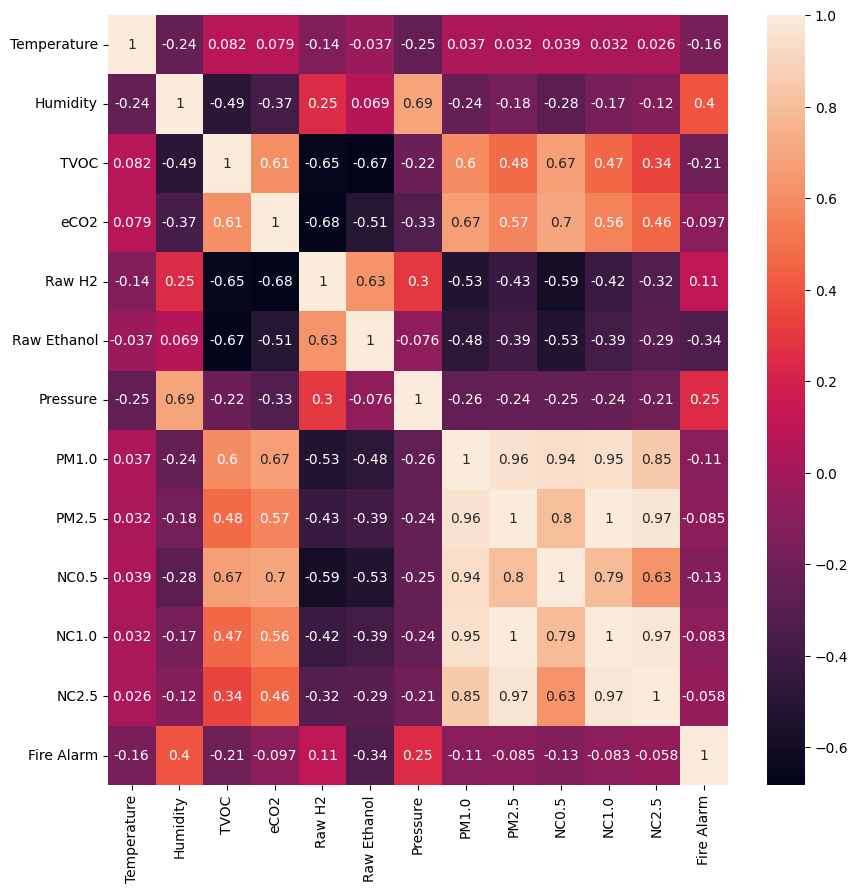

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)
plt.savefig('correlation_matrix.png')

In [8]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['PM2.5', 'NC1.0', 'NC2.5']


In [9]:
df1 = df.drop(columns= to_drop, axis=0)
df1.head()

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,NC0.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0


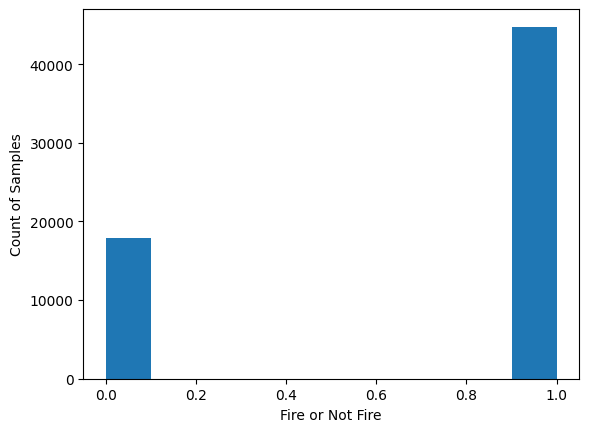

In [10]:
plt.hist(df['Fire Alarm'])
plt.xlabel('Fire or Not Fire')
plt.ylabel('Count of Samples')
plt.savefig('target_bar.png')

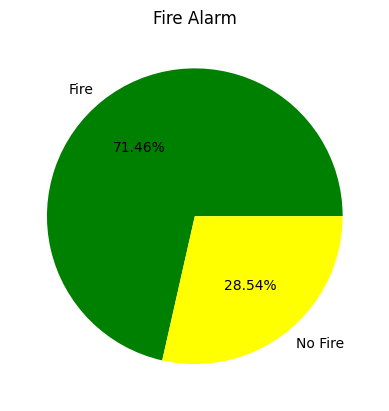

In [11]:
plt.pie(df['Fire Alarm'].value_counts(),labels=['Fire','No Fire'],autopct='%1.2f%%',colors=['green','yellow'])
plt.title('Fire Alarm')
plt.savefig('target_pie.png')
plt.show()

In [12]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [13]:
X = df1.drop('Fire Alarm', axis=1)
y = df1['Fire Alarm']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(f'X_train shape:{X_train.shape} and y_trian shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape} and y_test shape:{y_test.shape}')

X_train shape:(43841, 9) and y_trian shape:(43841,)
X_test shape:(18789, 9) and y_test shape:(18789,)


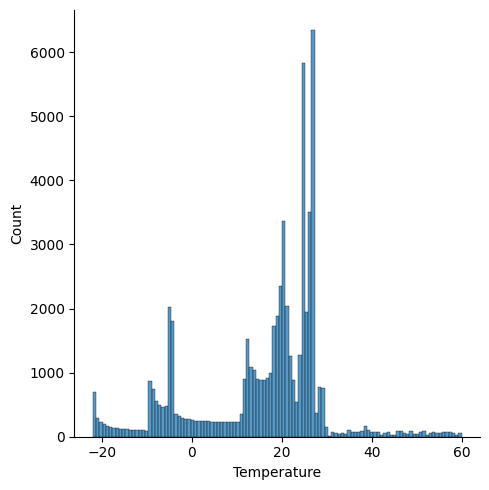

In [14]:
sns.displot(df, x='Temperature')

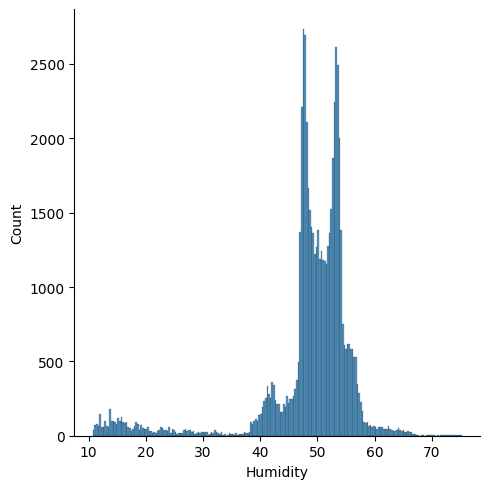

In [15]:
sns.displot(df, x='Humidity')

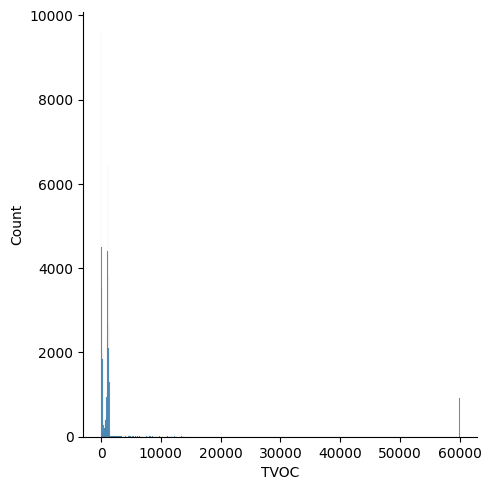

In [16]:
sns.displot(df, x='TVOC')

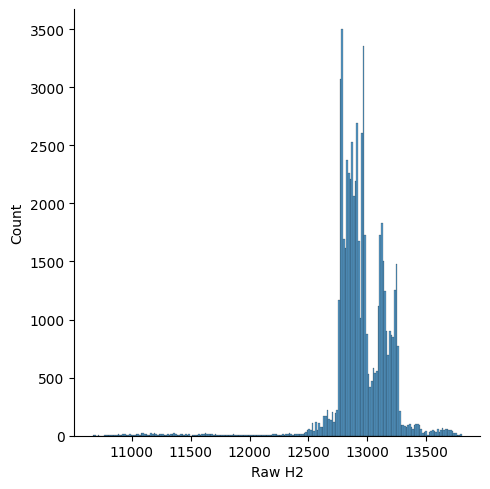

In [17]:
sns.displot(df, x='Raw H2')

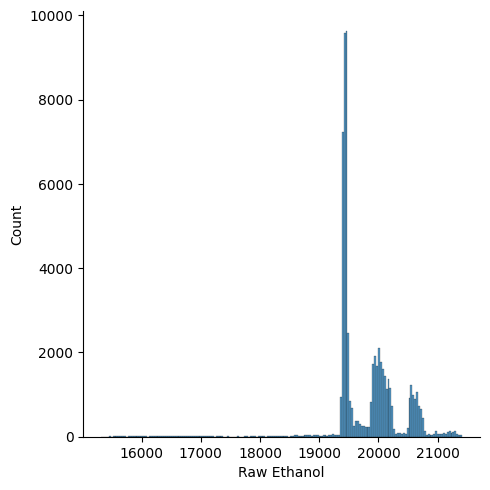

In [18]:
sns.displot(df, x='Raw Ethanol')

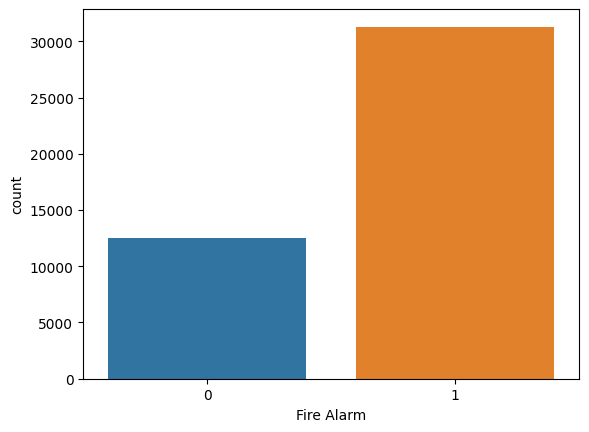

In [19]:
sns.countplot(x = y_train)
plt.savefig('before_smote.png')

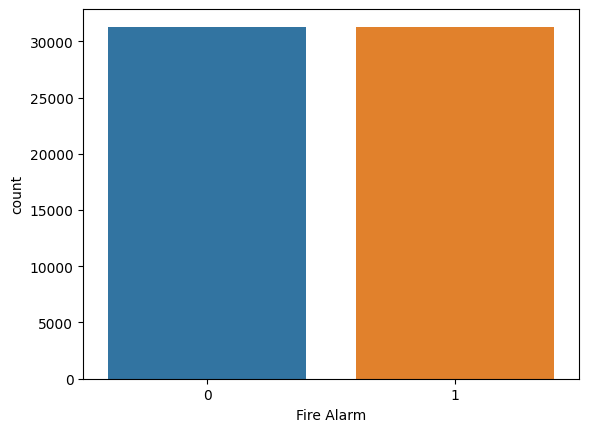

In [20]:
smote = SMOTE(sampling_strategy='not majority')
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)
sns.countplot(x=y_train_smote)
plt.savefig('after_smote.png')

In [21]:
models = [LogisticRegression(), GaussianNB(), SGDClassifier(loss = 'log'), KNeighborsClassifier(), DecisionTreeClassifier(),
         RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LGBMClassifier(), XGBClassifier(), LinearDiscriminantAnalysis(),
         MLPClassifier(alpha=1, max_iter=1000)]

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train_smote = minmax.fit_transform(X_train_smote)
X_test = minmax.transform(X_test)

In [22]:
Name = []
Accuracy = []
F1 = []
AUC = []
for model in models:
    Name.append(type(model).__name__)
    model.fit(X_train_smote,y_train_smote)
    prediction = model.predict(X_test)
    accuracyScore = accuracy_score(prediction,y_test)
    f1score = f1_score(prediction,y_test)
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=10)
    Accuracy.append(accuracyScore)
    F1.append(f1score)
    AUC.append(auc)
    
Dict = {'Name':Name,'Accuracy':Accuracy,'F1 Score':F1,'AUC': AUC}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,F1 Score,AUC
0,LogisticRegression,0.897546,0.926327,0.950709
1,GaussianNB,0.788067,0.868407,0.940009
2,SGDClassifier,0.887753,0.920490,0.945134
3,KNeighborsClassifier,0.998403,0.998885,0.999543
4,DecisionTreeClassifier,0.999894,0.999926,0.999869
5,RandomForestClassifier,0.999894,0.999926,0.999999
6,GradientBoostingClassifier,0.999681,0.999777,0.999999
7,AdaBoostClassifier,0.999574,0.999703,0.999942
8,LGBMClassifier,0.999627,0.999740,0.999939
9,XGBClassifier,0.999840,0.999889,1.000000


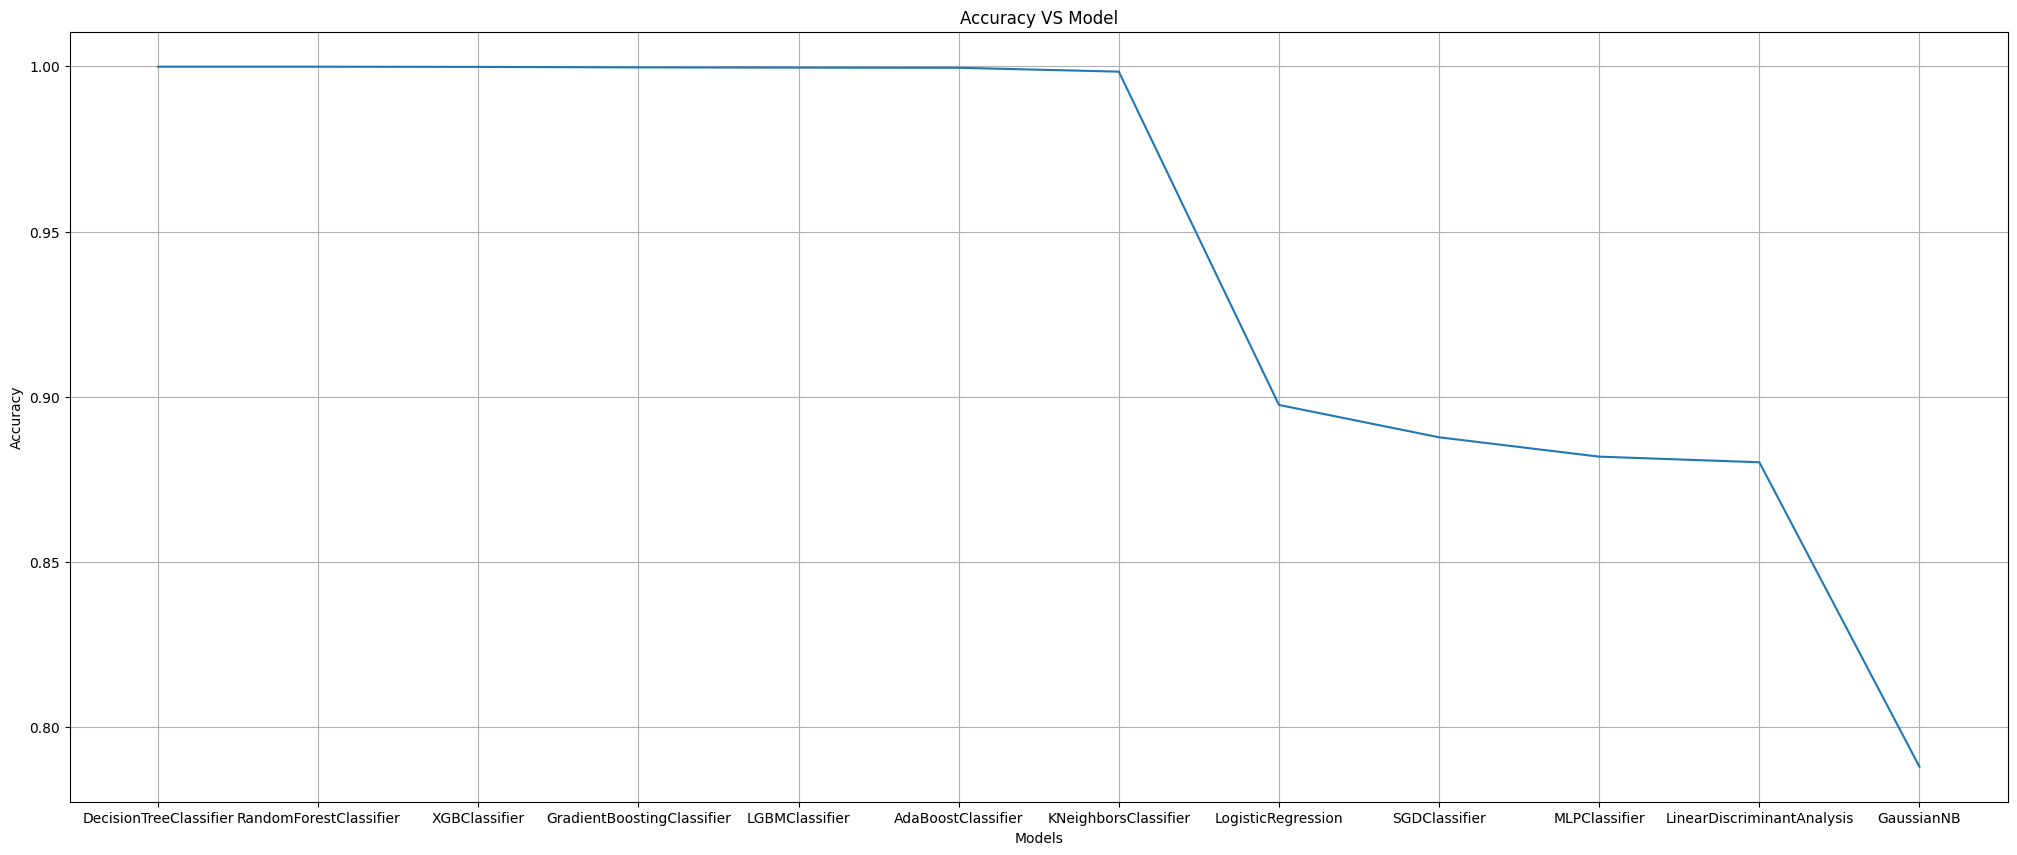

In [23]:
model_df.sort_values(by = 'Accuracy',ascending = False,inplace = True)
plt.figure(figsize=(25,10))
plt.plot(model_df['Name'], model_df['Accuracy']) 
plt.title('Accuracy VS Model')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid()
plt.savefig('accuracy_model.png')
plt.show()


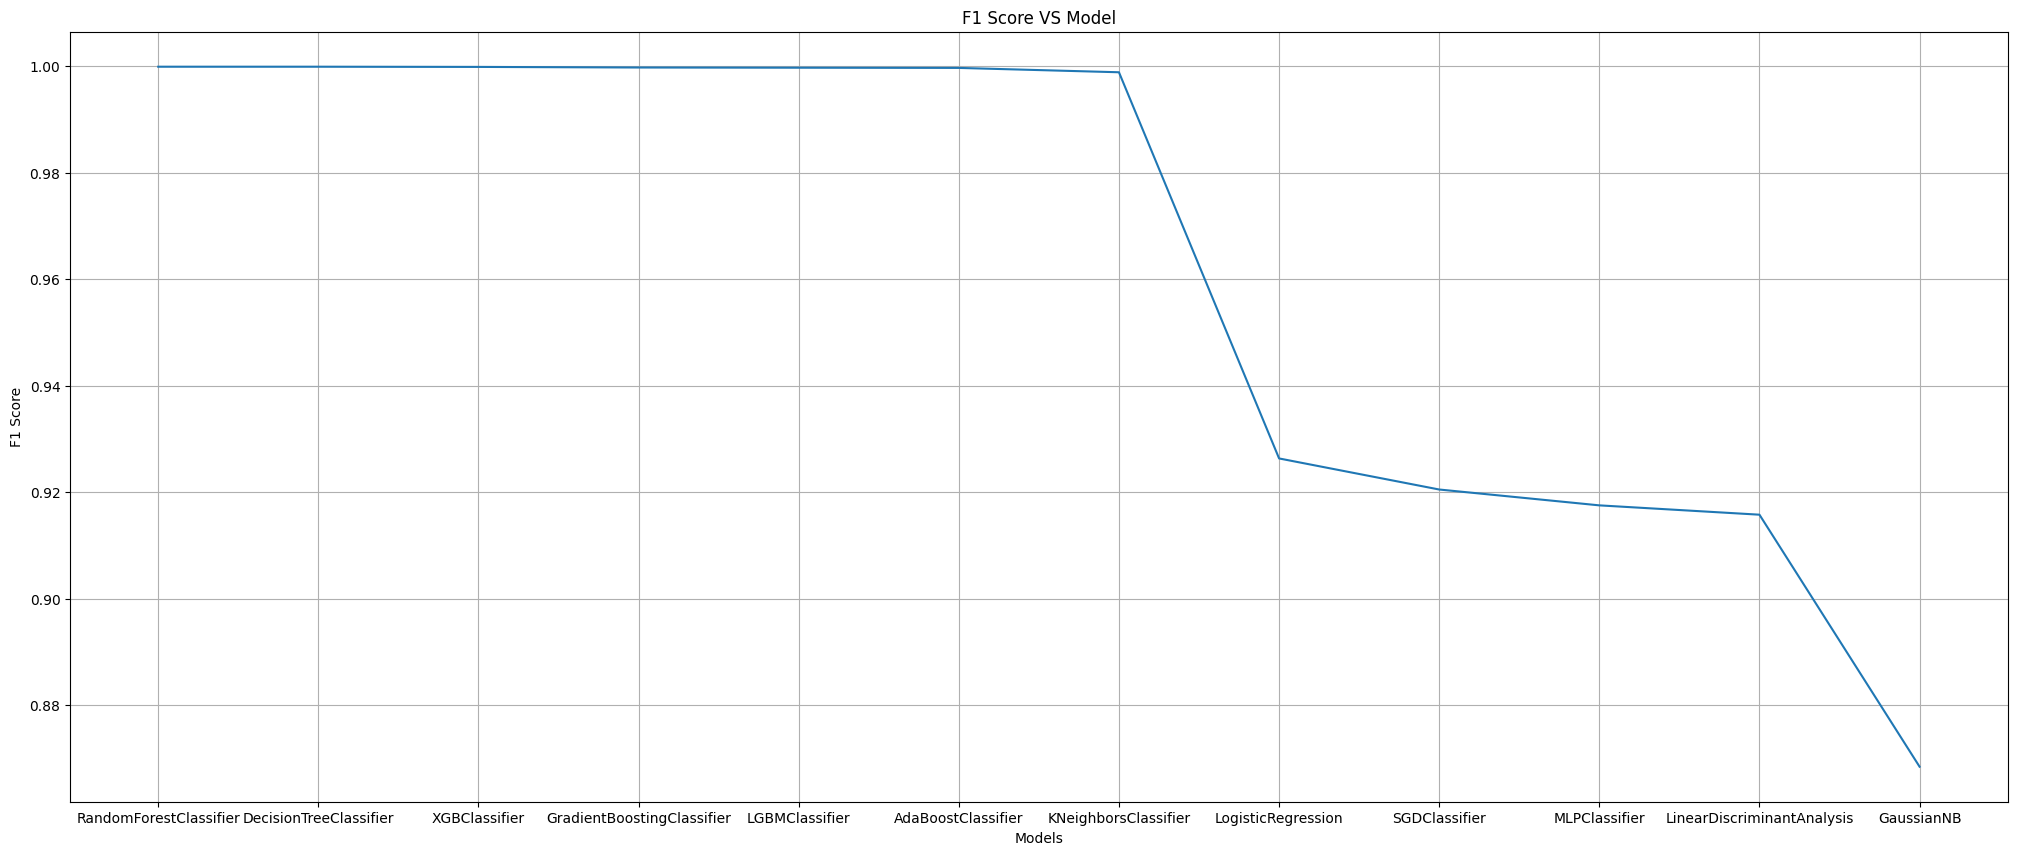

In [24]:
model_df.sort_values(by = 'F1 Score',ascending = False,inplace = True)
plt.figure(figsize=(25,10))
plt.plot(model_df['Name'], model_df['F1 Score']) 
plt.title('F1 Score VS Model')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.grid()
plt.savefig('f1score_model.png')
plt.show()


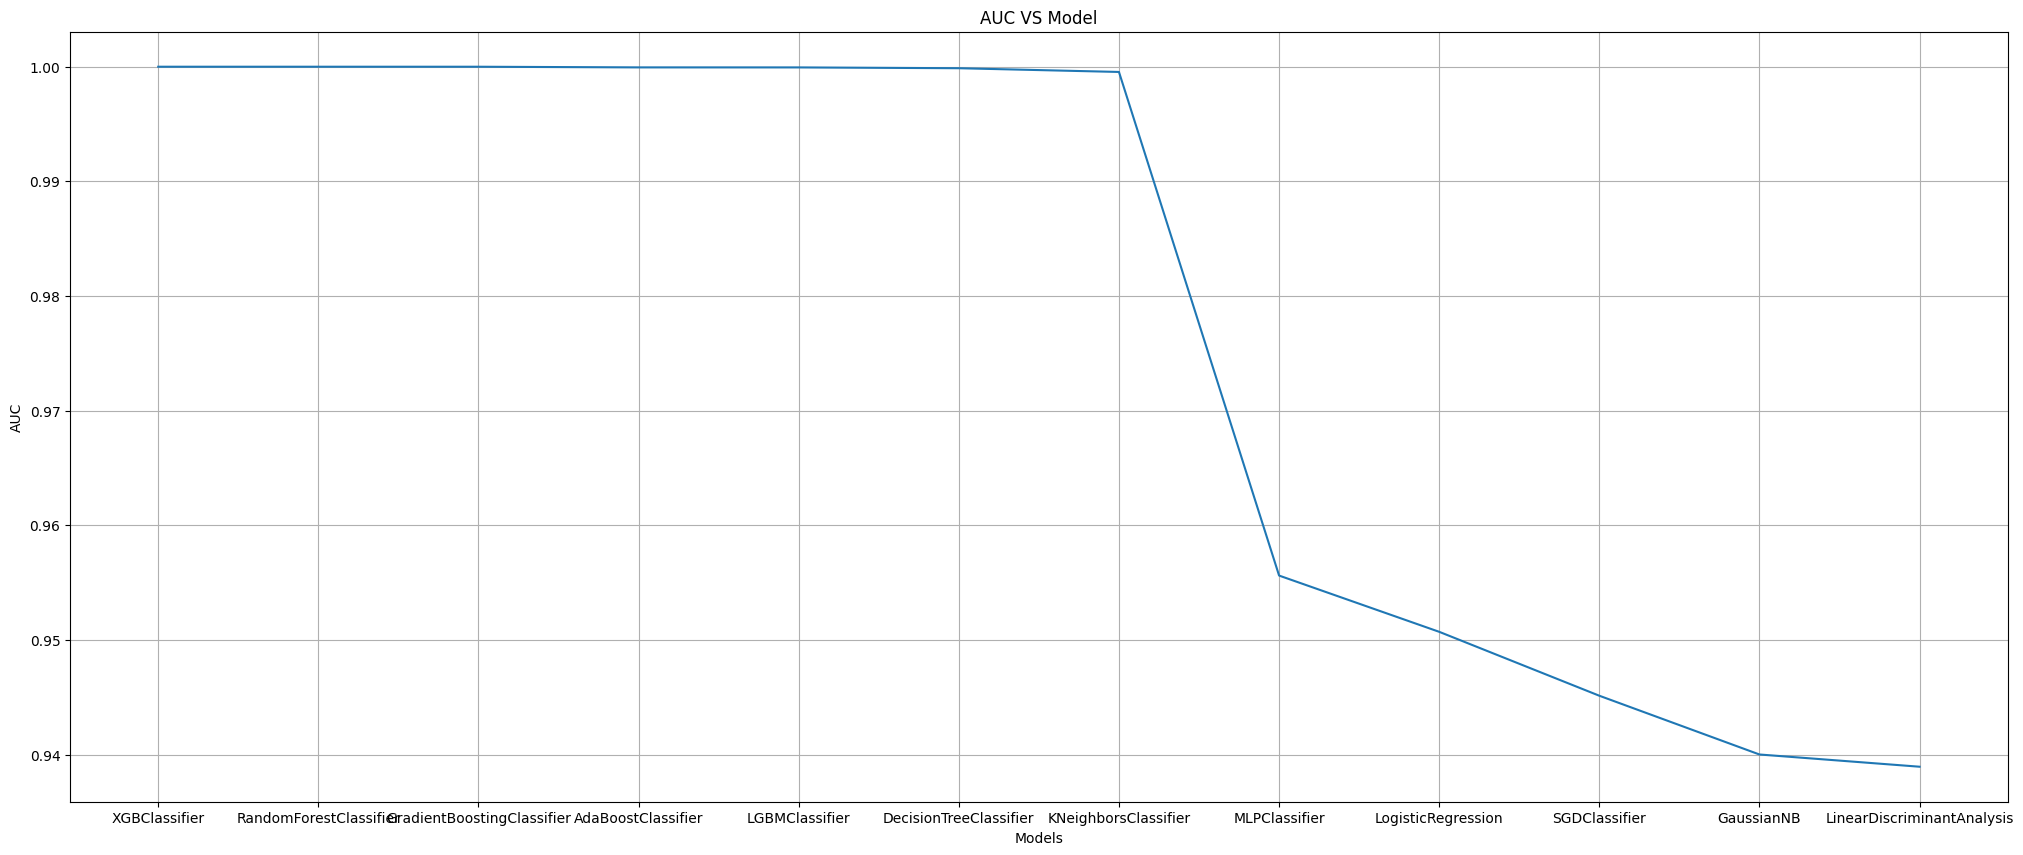

In [25]:
model_df.sort_values(by = 'AUC',ascending = False,inplace = True)
plt.figure(figsize=(25,10))
plt.plot(model_df['Name'], model_df['AUC']) 
plt.title('AUC VS Model')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.grid()
plt.savefig('auc_model.png')
plt.show()


In [26]:
target_names = ['Not Fire','Fire']

Accuracy: 0.897546436744904
F1 Score: 0.926327069539592
AUC: 0.950709148882037
CV Score: 0.90 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       0.78      0.89      0.83      5336
        Fire       0.95      0.90      0.93     13453

    accuracy                           0.90     18789
   macro avg       0.87      0.90      0.88     18789
weighted avg       0.90      0.90      0.90     18789



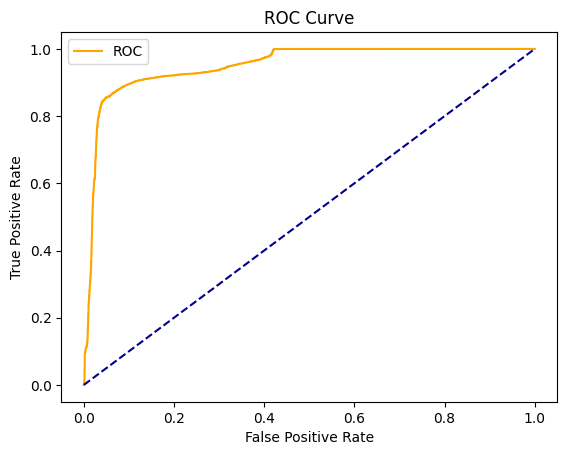

<AxesSubplot:>

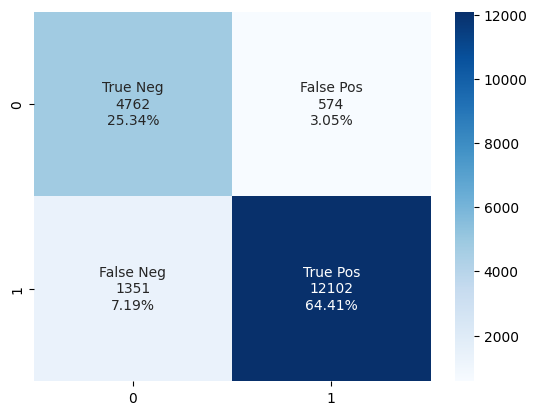

In [27]:
model0 = LogisticRegression()
model0.fit(X_train_smote,y_train_smote)
prediction = model0.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model0.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model0, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.7880674862951728
F1 Score: 0.8684071381361533
AUC: 0.9400090545116202
CV Score: 0.64 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       0.84      0.31      0.46      5336
        Fire       0.78      0.98      0.87     13453

    accuracy                           0.79     18789
   macro avg       0.81      0.64      0.66     18789
weighted avg       0.80      0.79      0.75     18789



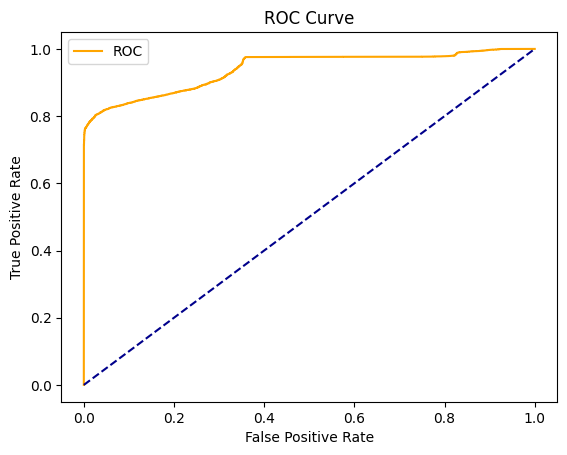

<AxesSubplot:>

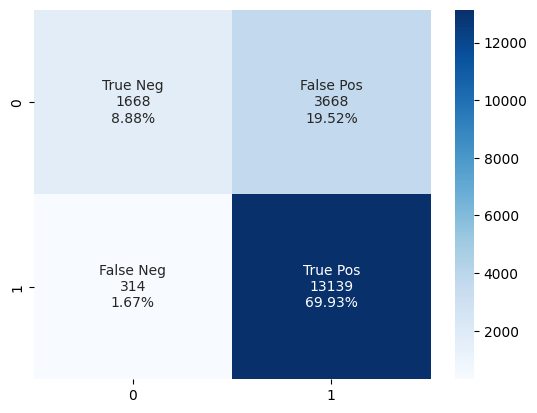

In [28]:
model1 = GaussianNB()
model1.fit(X_train_smote,y_train_smote)
prediction = model1.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model1.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
scores = cross_val_score(model1, X_train_smote, y_train_smote, cv=5)

print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.8912129437436798
F1 Score: 0.9218295854367446
AUC: 0.9450919888676785
CV Score: 0.87 accuracy with a standard deviation of 0.01
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       0.77      0.88      0.82      5336
        Fire       0.95      0.90      0.92     13453

    accuracy                           0.89     18789
   macro avg       0.86      0.89      0.87     18789
weighted avg       0.90      0.89      0.89     18789



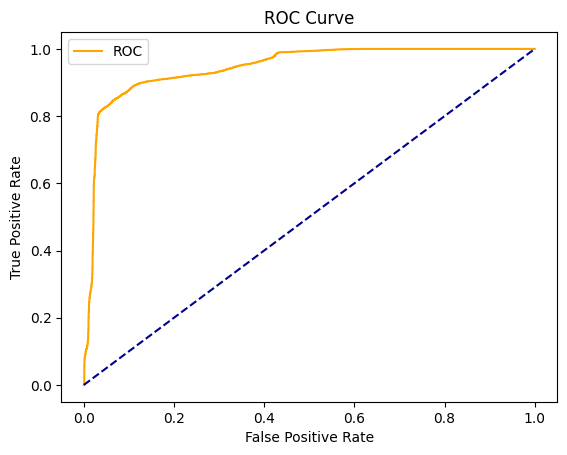

<AxesSubplot:>

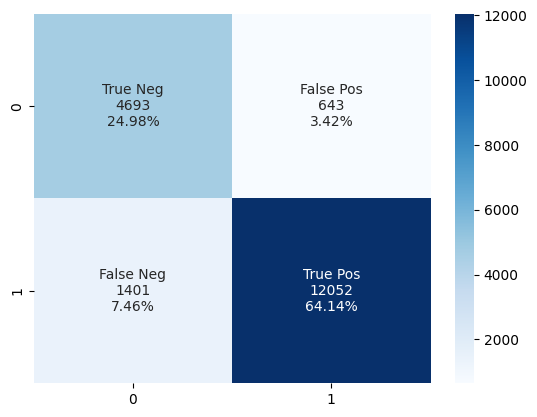

In [29]:
model2 = SGDClassifier(loss = 'log')
model2.fit(X_train_smote,y_train_smote)
prediction = model2.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model2.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model2, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.9984033210921284
F1 Score: 0.9988846754405533
AUC: 0.9995434783723132
CV Score: 1.00 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       1.00      1.00      1.00      5336
        Fire       1.00      1.00      1.00     13453

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



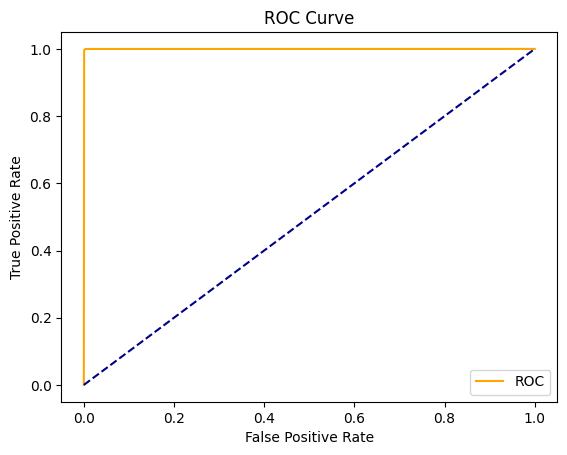

<AxesSubplot:>

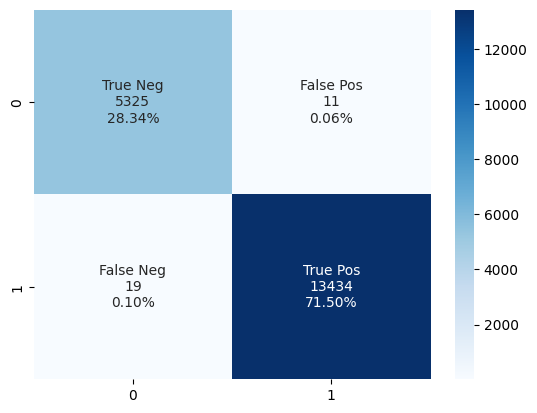

In [30]:
model3 = KNeighborsClassifier()
model3.fit(X_train_smote,y_train_smote)
prediction = model3.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model3.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model3, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.9998403321092129
F1 Score: 0.999888504850039
AUC: 0.9997754272718691
CV Score: 1.00 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       1.00      1.00      1.00      5336
        Fire       1.00      1.00      1.00     13453

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



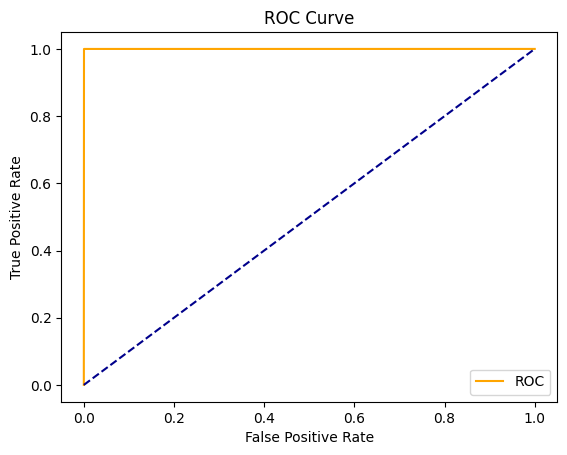

<AxesSubplot:>

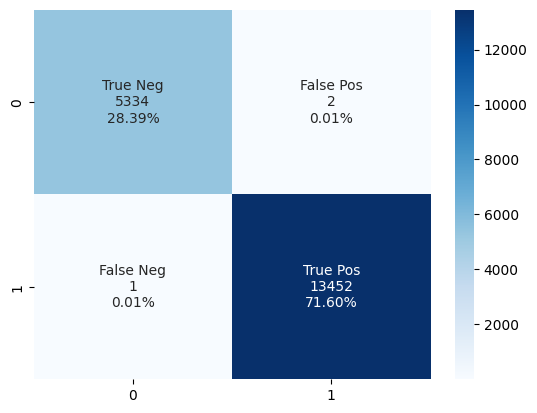

In [31]:
model4 = DecisionTreeClassifier()
model4.fit(X_train_smote,y_train_smote)
prediction = model4.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model4.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model4, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.9998935547394753
F1 Score: 0.9999256726624053
AUC: 0.9999995472604886
CV Score: 1.00 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       1.00      1.00      1.00      5336
        Fire       1.00      1.00      1.00     13453

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



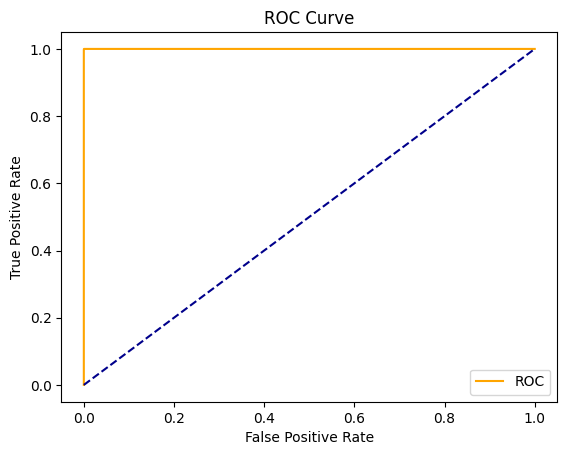

<AxesSubplot:>

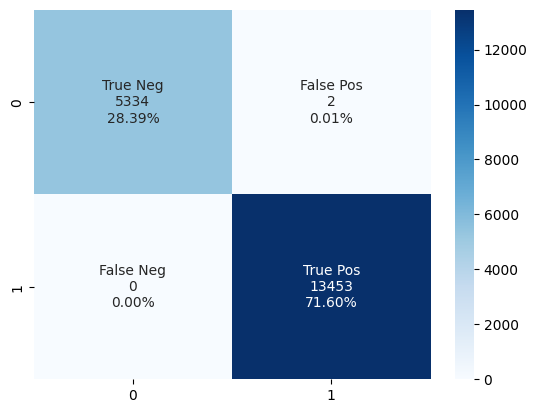

In [32]:
model5 = RandomForestClassifier()
model5.fit(X_train_smote,y_train_smote)
prediction = model5.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model5.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model5, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.9996806642184257
F1 Score: 0.9997770014123244
AUC: 0.9999985164074471
CV Score: 1.00 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       1.00      1.00      1.00      5336
        Fire       1.00      1.00      1.00     13453

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



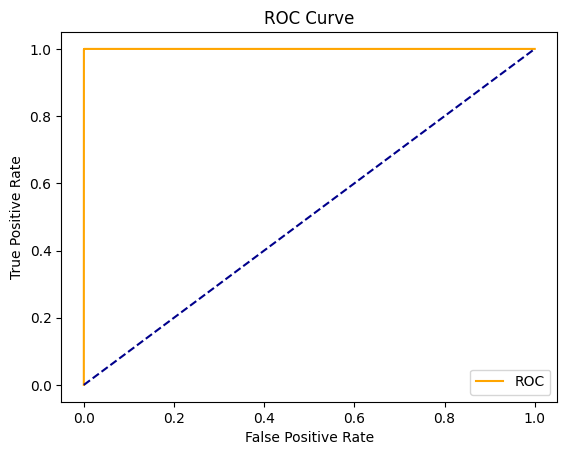

<AxesSubplot:>

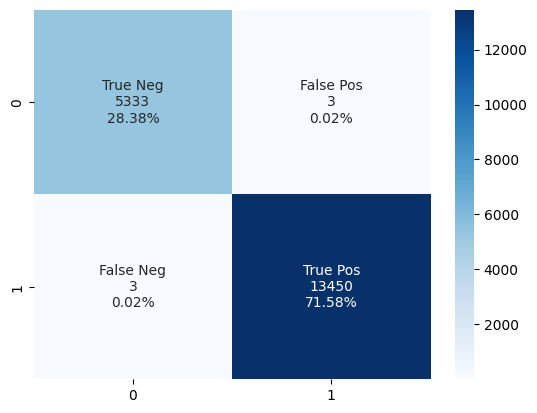

In [33]:
model6 = GradientBoostingClassifier()
model6.fit(X_train_smote,y_train_smote)
prediction = model6.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model6.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model6, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.9995742189579009
F1 Score: 0.9997026685497659
AUC: 0.9999417010813705
CV Score: 1.00 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       1.00      1.00      1.00      5336
        Fire       1.00      1.00      1.00     13453

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



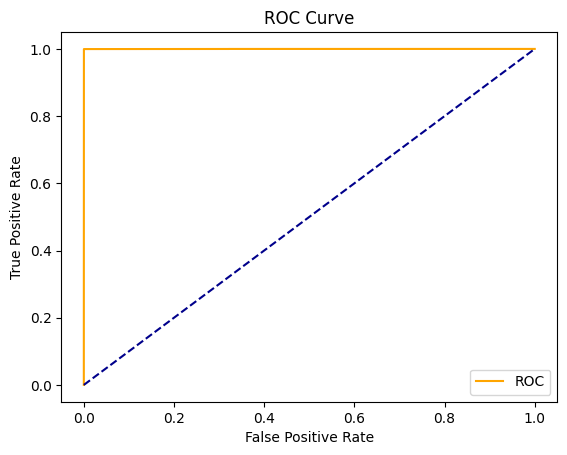

<AxesSubplot:>

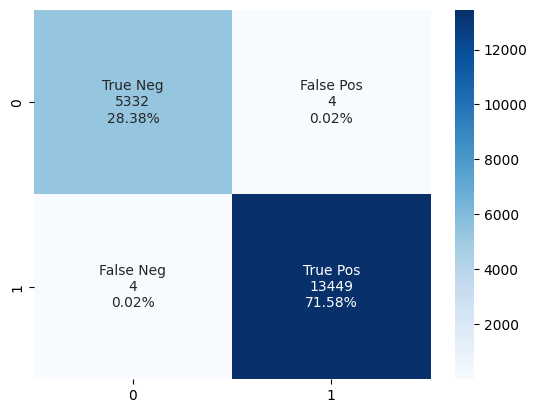

In [34]:
model7 =  AdaBoostClassifier()
model7.fit(X_train_smote,y_train_smote)
prediction = model7.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model7.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model7, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.9996274415881633
F1 Score: 0.9997398059695946
AUC: 0.9999392214618922
CV Score: 1.00 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       1.00      1.00      1.00      5336
        Fire       1.00      1.00      1.00     13453

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



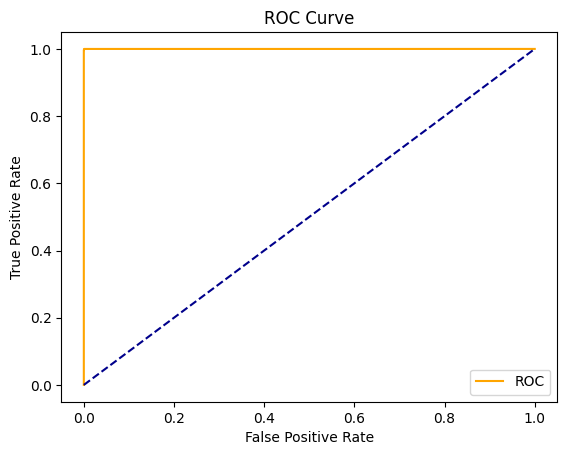

<AxesSubplot:>

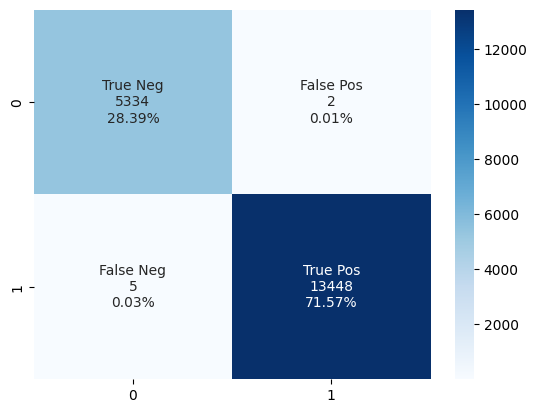

In [35]:
model8 =  LGBMClassifier()
model8.fit(X_train_smote,y_train_smote)
prediction = model8.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model8.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model8, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.9998403321092129
F1 Score: 0.999888504850039
AUC: 0.9999997631824094
CV Score: 1.00 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       1.00      1.00      1.00      5336
        Fire       1.00      1.00      1.00     13453

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



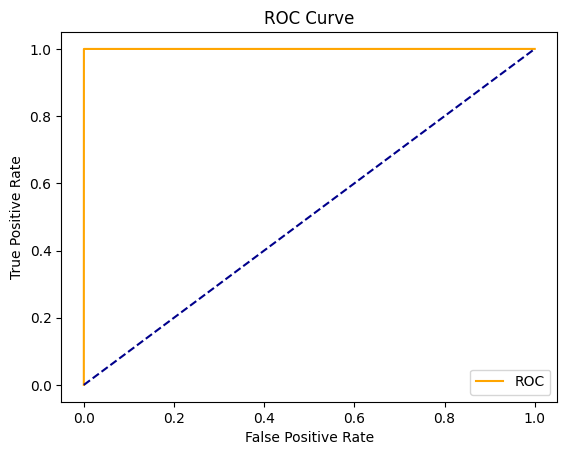

<AxesSubplot:>

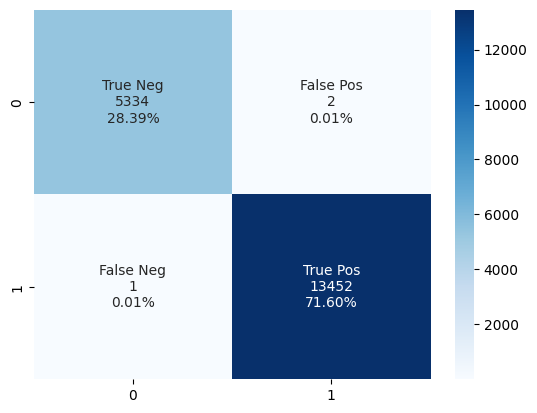

In [36]:
model9 =  XGBClassifier()
model9.fit(X_train_smote,y_train_smote)
prediction = model9.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model9.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model9, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.8801958592793656
F1 Score: 0.9157591407507204
AUC: 0.9389420589266804
CV Score: 0.87 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       0.78      0.81      0.79      5336
        Fire       0.92      0.91      0.92     13453

    accuracy                           0.88     18789
   macro avg       0.85      0.86      0.85     18789
weighted avg       0.88      0.88      0.88     18789



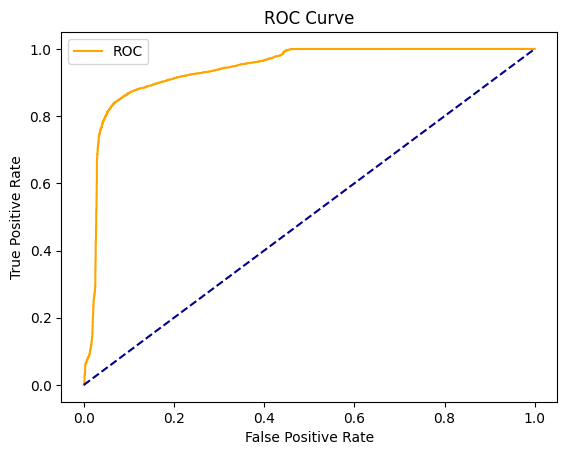

<AxesSubplot:>

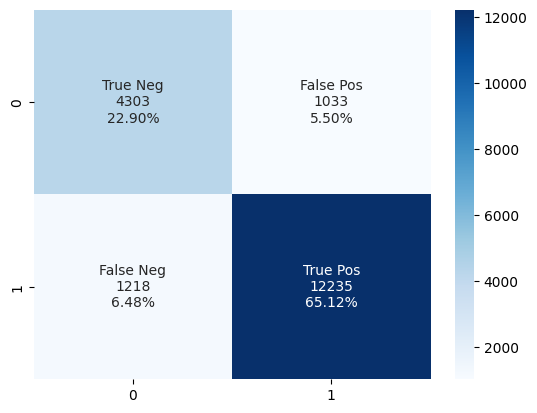

In [37]:
model10 =  LinearDiscriminantAnalysis()
model10.fit(X_train_smote,y_train_smote)
prediction = model10.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model10.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model10, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Accuracy: 0.8824312097503859
F1 Score: 0.9176637220917665
AUC: 0.9553223137557809
CV Score: 0.86 accuracy with a standard deviation of 0.01
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       0.79      0.80      0.79      5336
        Fire       0.92      0.92      0.92     13453

    accuracy                           0.88     18789
   macro avg       0.85      0.86      0.86     18789
weighted avg       0.88      0.88      0.88     18789



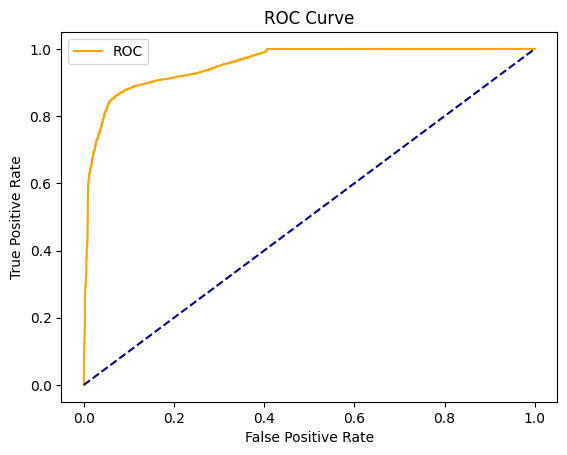

<AxesSubplot:>

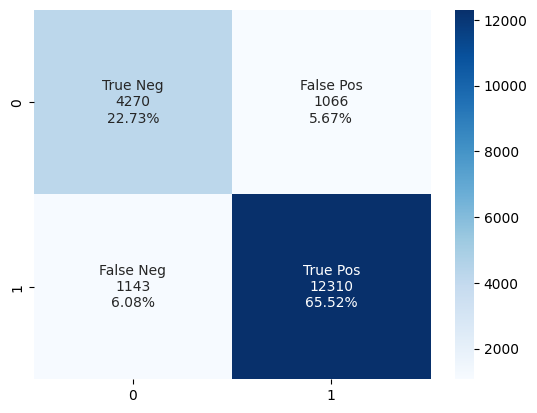

In [38]:
model11 =  MLPClassifier(alpha=1, max_iter=1000)
model11.fit(X_train_smote,y_train_smote)
prediction = model11.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = model11.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(model11, X_train_smote, y_train_smote, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [44]:
estimators = [#('log',LogisticRegression()),
              #('dt',DecisionTreeClassifier()),
              #('rf',RandomForestClassifier()),
              #('gb',GradientBoostingClassifier()),
              #('lgbm',LGBMClassifier()),
              ('xgb',XGBClassifier()),
              ('mlp',MLPClassifier(alpha=1, max_iter=1000)),
              ('gauss',GaussianNB())
              #('knn',KNeighborsClassifier())
            ]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),n_jobs=-1)
stack.fit(X_train_smote, y_train_smote).score(X_test, y_test)

0.9998403321092129

Accuracy: 0.9998403321092129
F1 Score: 0.999888504850039
AUC: 0.9999825451505274
CV Score: 1.00 accuracy with a standard deviation of 0.00
Classification Report: 
              precision    recall  f1-score   support

    Not Fire       1.00      1.00      1.00      5336
        Fire       1.00      1.00      1.00     13453

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



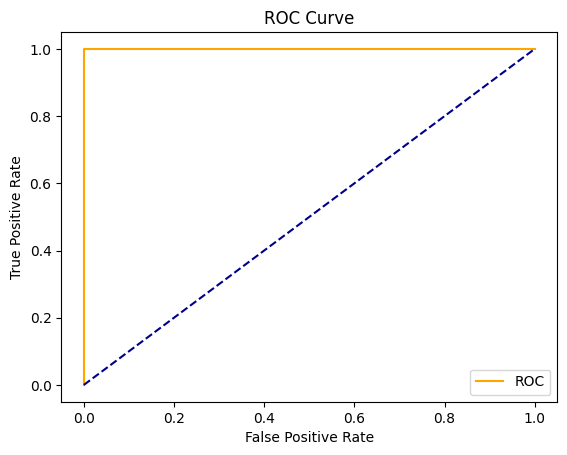

<AxesSubplot:>

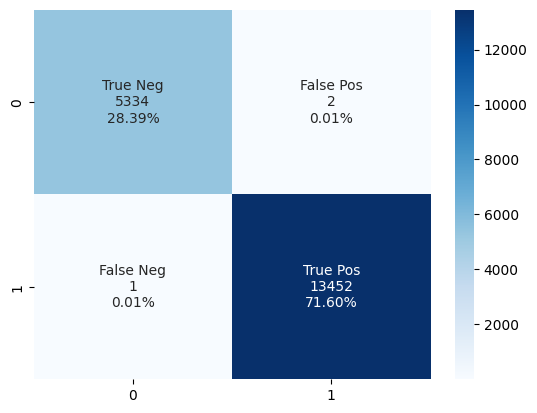

In [40]:
prediction = stack.predict(X_test)
accuracyScore = accuracy_score(prediction,y_test)
f1score = f1_score(prediction,y_test)
probs = stack.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
scores = cross_val_score(stack, X_test, y_test, cv=5)
print(f'Accuracy: {accuracyScore}')
print(f'F1 Score: {f1score}')
print(f'AUC: {auc}')
print("CV Score: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Classification Report: ')
print(classification_report(y_test, prediction, target_names=target_names))
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
cf_matrix = confusion_matrix(y_test, prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Feature: 0, Score: 0.03465
Feature: 1, Score: 0.08941
Feature: 2, Score: 0.23981
Feature: 3, Score: 0.01633
Feature: 4, Score: 0.06049
Feature: 5, Score: 0.11736
Feature: 6, Score: 0.29528
Feature: 7, Score: 0.06609
Feature: 8, Score: 0.08058


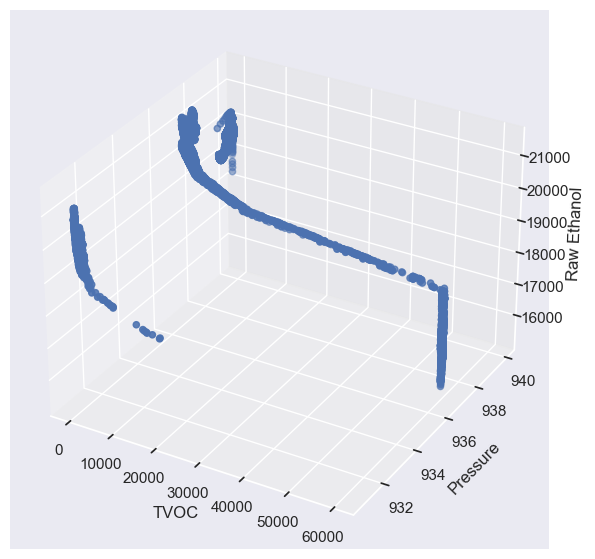

In [41]:
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

x = X_train['TVOC']
y = X_train['Pressure']
z = X_train['Raw Ethanol']
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("TVOC")
ax.set_ylabel("Pressure")
ax.set_zlabel("Raw Ethanol")

ax.scatter3D(x, y, z)
plt.savefig('3dplot.png')
plt.show()

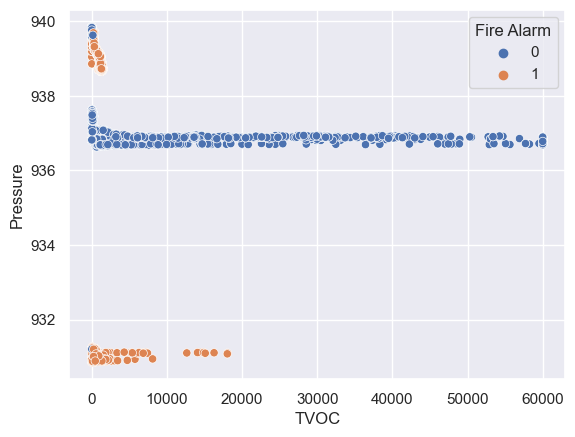

In [42]:
sns.scatterplot(x=X_train['TVOC'],y = X_train['Pressure'], hue = y_train)
plt.savefig('scatter1.png')

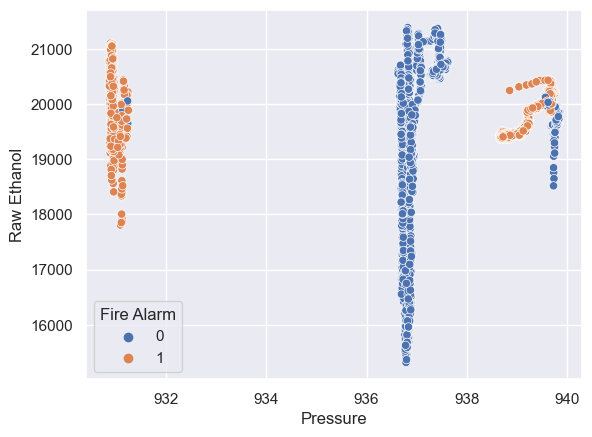

In [43]:
sns.scatterplot(x=X_train['Pressure'],y = X_train['Raw Ethanol'], hue = y_train)
plt.savefig('scatter2.png')